In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("../raw_data/Achilles_QC_v2.4.3.rnai.Gs.gct", delimiter="\t", index_col="Name")
df.drop("Description", axis=1, inplace=True)
df.dropna(inplace=True)
print df.head()

                    22RV1_PROSTATE  697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  \
Name                                                                         
A2ML1_1_01110             0.394594                                0.730798   
AADAC_1_11001            -0.130884                               -0.621311   
AADAT_1_11010            -1.233717                                1.630825   
AADAT_2_00101             0.540022                               -0.063913   
AAK1_1_01111011111       -0.386657                                1.229293   

                    786O_KIDNEY  A1207_CENTRAL_NERVOUS_SYSTEM  \
Name                                                            
A2ML1_1_01110         -1.200988                     -0.366327   
AADAC_1_11001         -1.280822                      1.155876   
AADAT_1_11010         -0.609781                      0.220788   
AADAT_2_00101         -0.075909                      0.203345   
AAK1_1_01111011111     0.055042                     -0.037928  

In [14]:
print df.describe()

       22RV1_PROSTATE  697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  786O_KIDNEY  \
count     5690.000000                             5690.000000  5690.000000   
mean        -0.033977                                0.071798     0.057938   
std          0.717656                                0.893396     0.752741   
min         -2.985807                               -3.535088    -3.794766   
25%         -0.530223                               -0.501890    -0.445195   
50%         -0.012730                                0.117127     0.054440   
75%          0.459845                                0.672828     0.523820   
max          3.437556                                3.623722     4.309728   

       A1207_CENTRAL_NERVOUS_SYSTEM  A172_CENTRAL_NERVOUS_SYSTEM  \
count                   5690.000000                  5690.000000   
mean                       0.118923                     0.006361   
std                        0.883121                     0.751057   
min                      

In [15]:
print df.transpose().describe()

Name   A2ML1_1_01110  AADAC_1_11001  AADAT_1_11010  AADAT_2_00101  \
count     216.000000     216.000000     216.000000     216.000000   
mean       -0.000886       0.128938       0.017678      -0.040943   
std         0.715384       0.899834       0.984958       0.762544   
min        -1.990331      -2.219202      -2.256570      -1.928425   
25%        -0.407022      -0.605744      -0.722998      -0.538102   
50%        -0.012775       0.081236       0.000878      -0.072024   
75%         0.520813       0.777429       0.689838       0.418260   
max         2.481954       3.109785       3.433961       2.187258   

Name   AAK1_1_01111011111  AAK1_2_10000100000  AANAT_1_10101  \
count          216.000000          216.000000     216.000000   
mean             0.069375           -0.013887       0.075339   
std              0.665533            0.646722       0.770884   
min             -1.504550           -1.507836      -1.814418   
25%             -0.423787           -0.433366      -0.4959

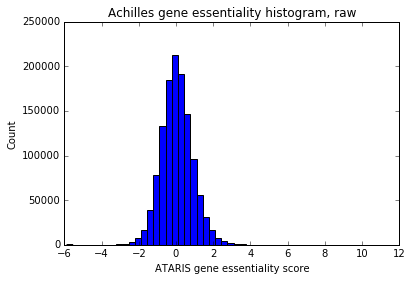

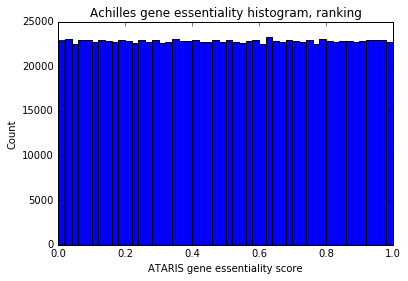

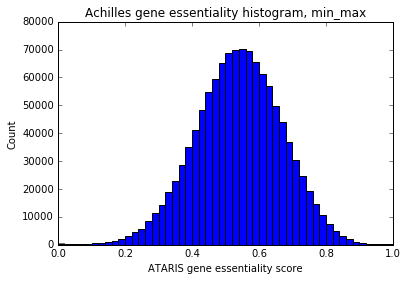

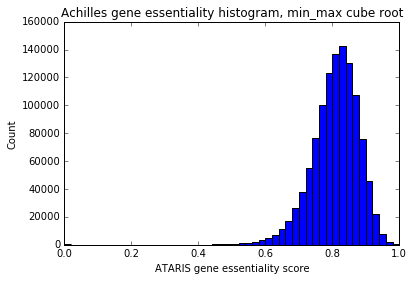

In [14]:
plt.figure(1)
all_values = df.values.flatten()
ax = plt.hist(all_values, bins=50)
plt.title("Achilles gene essentiality histogram, raw")
plt.xlabel("ATARIS gene essentiality score")
plt.ylabel("Count")

plt.figure(2)
df1 = pd.read_csv("../raw_data/Achilles_QC_v2.4.3.rnai.Gs.percent.txt", delimiter="\t")
df1.drop("Description", axis=1, inplace=True)
df1.dropna(inplace=True)
all_values = df1.values.flatten()
ax = plt.hist(all_values, bins=50)
plt.title("Achilles gene essentiality histogram, ranking")
plt.xlabel("ATARIS gene essentiality score")
plt.ylabel("Count")

plt.figure(3)
df1 = pd.read_csv("../raw_data/Achilles_QC_v2.4.3.rnai.Gs.minmax.txt", delimiter="\t")
df1.drop("Description", axis=1, inplace=True)
df1.dropna(inplace=True)
all_values = df1.values.flatten()
ax = plt.hist(all_values, bins=50)
plt.title("Achilles gene essentiality histogram, min_max")
plt.xlabel("ATARIS gene essentiality score")
plt.ylabel("Count")

plt.figure(4)
def cube_root(n):
    return n ** (1.0/3)
df1 = df1.applymap(cube_root)
all_values = df1.values.flatten()
ax = plt.hist(all_values, bins=50)
plt.title("Achilles gene essentiality histogram, min_max cube root")
plt.xlabel("ATARIS gene essentiality score")
plt.ylabel("Count")

In [31]:
print np.percentile(all_values, 99.9)
print np.percentile(all_values, 0.1)
print np.max(all_values)
print np.min(all_values)

3.21345520497
-2.83725945274
10.7434306769
-5.8760845772


In [25]:
toy_df = df[["Description", "IGROV1_OVARY", "COLO741_SKIN", "TC71_BONE", "HPAFII_PANCREAS", "NCIH1792_LUNG"]]
toy_df = toy_df[toy_df.Description.isin(["EGFR", "MDM2", "XIAP", "HSP90B1"])]
toy_df.drop("Description", axis=1, inplace=True)

In [38]:
print toy_df

                IGROV1_OVARY  COLO741_SKIN  TC71_BONE  HPAFII_PANCREAS  \
Name                                                                     
EGFR_1_00011       -0.439768     -0.568740  -0.521517         1.061267   
HSP90B1_1_0111      0.907320      0.280850  -1.082615         0.613687   
MDM2_1_1111        -0.467626      0.172475  -1.170011         1.986512   
XIAP_1_00101        0.029746     -1.123995  -0.073243         0.464377   

                NCIH1792_LUNG  
Name                           
EGFR_1_00011        -0.255228  
HSP90B1_1_0111      -0.029134  
MDM2_1_1111          0.431833  
XIAP_1_00101        -0.075738  


In [46]:
def min_max_scaler(n):
    if n < -2.83725945274:
        return 1
    elif n > 3.21345520497:
        return 0
    else:
        return (-n + 3.21345520497)/(3.21345520497+2.83725945274)

In [47]:
toy_df.applymap(min_max_scaler)

,IGROV1_OVARY,COLO741_SKIN,TC71_BONE,HPAFII_PANCREAS,NCIH1792_LUNG
Name,,,,,
EGFR_1_00011,0.603767,0.625082,0.617278,0.355692,0.573268
HSP90B1_1_0111,0.381134,0.484671,0.710010,0.429663,0.535902
MDM2_1_1111,0.608371,0.502582,0.724454,0.202777,0.459718
XIAP_1_00101,0.526171,0.716849,0.543192,0.454339,0.543604
